In [14]:
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [15]:
df = pd.read_csv('/Users/a12345/Desktop/DATA PT /ML Project/03_ml/preprocessed_dataset_v2.csv')

In [16]:
df.head()

,pincode,customer_segment,total_orders,avg_order_value,tenure_days,area_encoded
0,321865,2,13,451.92,656,8
1,149394,0,4,825.48,254,9
2,621411,3,17,1969.81,155,12
3,826054,1,4,220.09,512,10
4,730539,0,14,578.14,342,12


In [17]:
features = df.drop(columns = ['customer_segment'])
target = df['customer_segment']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

X_test

,pincode,total_orders,avg_order_value,tenure_days,area_encoded
53,665417,9,854.35,506,9
2391,169284,14,1601.91,314,13
2310,720562,7,1660.54,705,5
728,626288,17,1906.92,299,13
850,626543,12,924.06,514,7
...,...,...,...,...,...
1810,626892,16,1249.15,397,16
2330,867852,10,1750.59,480,10
684,848392,20,336.21,485,8
1674,743207,6,1887.52,462,17


In [19]:
normalizer = MinMaxScaler()

normalizer.fit(X_train)

MinMaxScaler()

In [20]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [21]:
knn = KNeighborsRegressor(n_neighbors=10)

knn.fit(X_train_norm, y_train)

knn.score(X_test_norm, y_test)

-0.09265132986854163

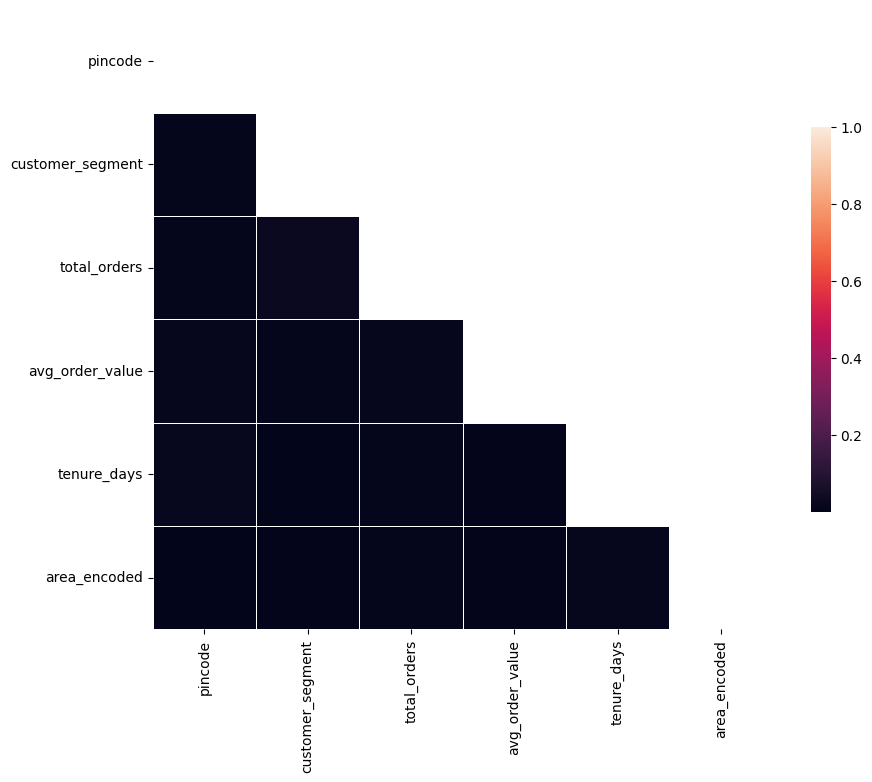

In [22]:
corr=np.abs(df.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [23]:
import seaborn as sns

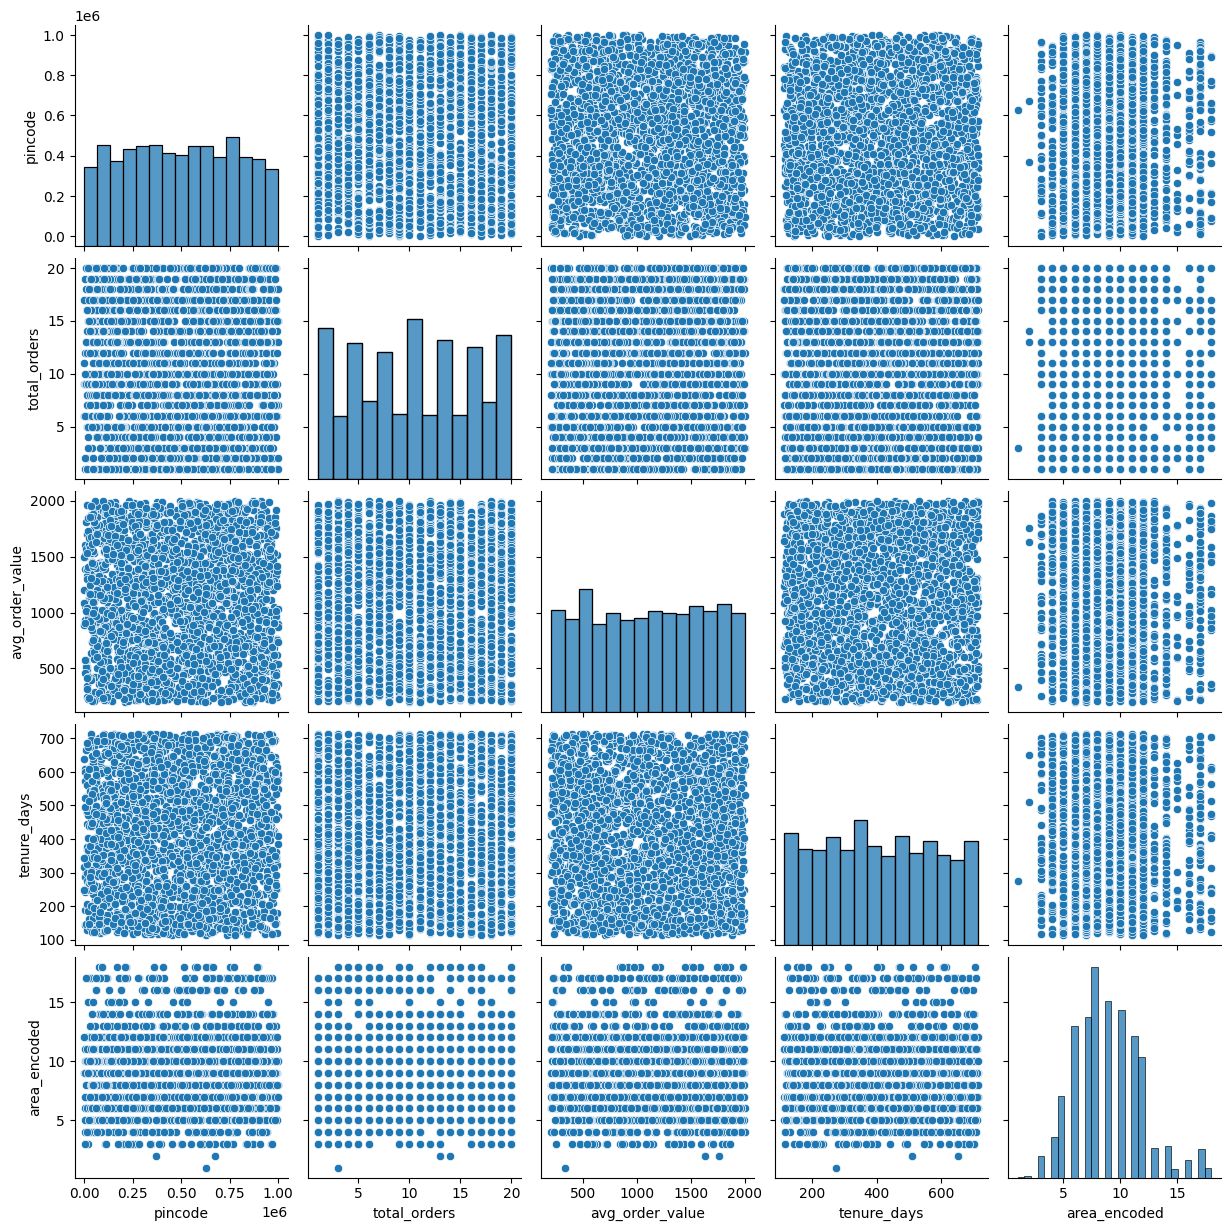

In [26]:
sns.pairplot(features)